# User-Interface for Res-IRF
The Res-IRF model is a tool for simulating energy consumption for space heating in the French residential sector.

Its main characteristic is to integrate a detailed description of the energy performance of the dwelling stock with a rich description of household behaviour.

This notebook is an example of post-treatment to **assess public policies**.

In [1]:
import os
print(os.getcwd())
os.chdir(os.path.join(os.getcwd(), '..'))
# print(os.getcwd())

/Users/lucas/PycharmProjects/Res-IRF/project


In [2]:
import pickle
from ui_utils import *
import matplotlib.pyplot as plt

from parse_input import colors_dict

**User need to enter folder's name:**

In [3]:
name_folder = '20210608_173304'

In [4]:
folder_output = os.path.join(os.getcwd(), 'project', 'output', name_folder)
scenarios = [f for f in os.listdir(folder_output) if f != 'log.txt']
folders = {scenario: os.path.join(folder_output, scenario) for scenario in scenarios} 
main_result = {scenario: pd.read_csv(os.path.join(folders[scenario], 'financials_dict.csv'), header=[0], index_col=[0]) for scenario in scenarios}

In [5]:
'Private investment'
'Investment macro'
''

''

In [6]:
main_result

{'No_CITE':                                      2019          2020          2021  \
 Consumption                  2.214752e+11  2.165654e+11  2.108060e+11   
 Consumption construction     6.184657e+08  2.071817e+09  4.310097e+09   
 Consumption total            2.220936e+11  2.186372e+11  2.151161e+11   
 Emission                     4.179911e+13  4.051880e+13  3.906567e+13   
 Emission construction        9.534923e+10  3.179679e+11  6.586102e+11   
 Emission total               4.189446e+13  4.083676e+13  3.972428e+13   
 Total number of renovations  4.953465e+05  5.682904e+05  6.950928e+05   
 Number of G & F buildings    4.287247e+06  4.042440e+06  3.765302e+06   
 Investment macro             6.931469e+09  7.499565e+09  8.074756e+09   
 Private investment macro     5.748731e+09  6.151621e+09  6.517541e+09   
 Subsidies macro              1.182737e+09  1.347944e+09  1.557214e+09   
 Energy taxes                 1.027963e+09  1.030602e+09  1.013047e+09   
 Energy taxes construction 

# Overview

# Costs

In [21]:
subsidies_macro = {scenario: main_result[scenario].loc['Subsidies macro', :] for scenario in scenarios}
subsidies_macro = pd.DataFrame(subsidies_macro).T / 10**9
cost_subsidies = abs(subsidies_macro.iloc[0, :] - subsidies_macro.iloc[1, :])

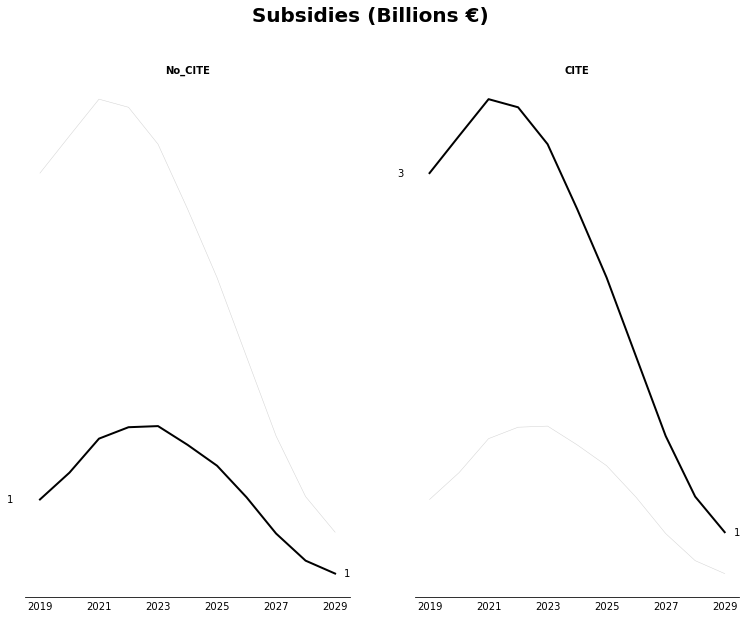

In [26]:
economic_subplots(subsidies_macro, 'Subsidies (Billions €)', n_columns=2)

# Objectives


1. Reduction of final energy consumption by 20% by 2030 and 50% by 2050 compared to 2012 - this objective is applied here to residential heating consumption;
2. Energy renovation of 500,000 homes per year, including 120,000 in social housing;
3. Disappearance of G and F energy performance housing by 2025;
4. Renovation of the entire housing stock to the "low-energy building" level or similar by 2050 - a requirement interpreted here as a minimum performance equal to the B label of the DPE;
5. Reducing fuel poverty by 15% by 2020.


## Objective 1 - Reduction consumption

Objective is to reduce of 20% in 2030, and 50% in 2050.  
Consumption total is measured in kWh --> / 10**9 --> TWh

In [17]:
consumption_total = {scenario: main_result[scenario].loc['Consumption total', :] for scenario in scenarios}
consumption_total = pd.DataFrame(consumption_total).T / 10**9
consumption_subsidies = consumption_total.iloc[0, :] - consumption_total.iloc[1, :]
consumption_total

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,222.093616,218.637174,215.116079,211.55562,208.042203,204.661095,201.532041,198.881269,196.965443,195.990243,196.107666
CITE,221.358276,217.177794,212.936675,208.70590,204.641966,200.869035,197.521559,194.825828,193.004517,192.234195,192.617515


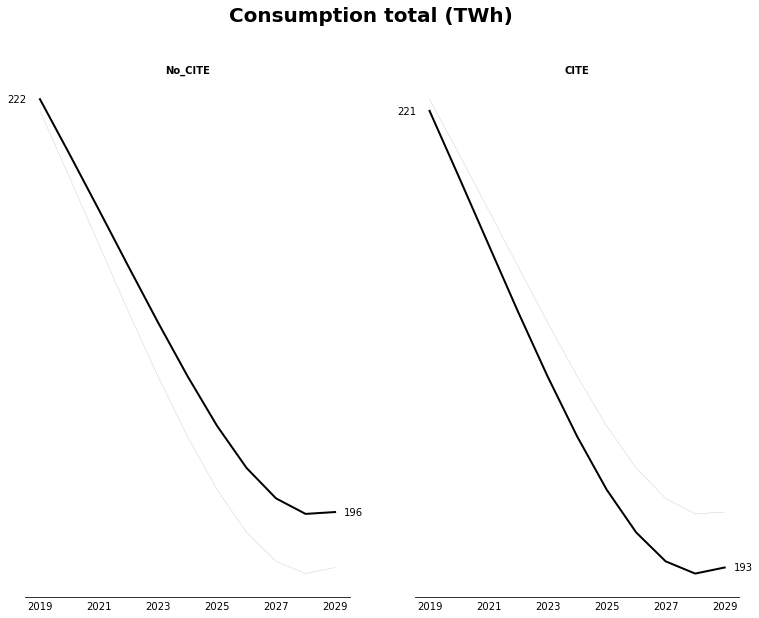

In [10]:
economic_subplots(consumption_total, 'Consumption total (TWh)', n_columns=2)

### Efficacity

Billion € / TWh cumac --> 10^9€ / 10^9 kWh --> €/kWh

In [28]:
df = pd.concat((cost_subsidies, consumption_subsidies, cost_subsidies / consumption_subsidies), axis=1)
df.columns = ['Billions €', 'TWh cumac', '€/kWh']
df

,Billions €,TWh cumac,€/kWh
2019,2.008820,0.735340,2.731823
2020,2.072434,1.459380,1.420078
2021,2.089377,2.179404,0.958692
2022,1.969135,2.849721,0.690992
2023,1.735115,3.400237,0.510292
2024,1.451922,3.792059,0.382885
2025,1.157663,4.010482,0.288659
2026,0.864834,4.055442,0.213253
2027,0.600633,3.960927,0.151639
2028,0.394245,3.756048,0.104963


### Efficiency

#### a

## Objective 2 - Total number of renovations

Renovation of 500,000 housings/yr with 120,000/yr for social-housing.

In [34]:
renovations_total = {scenario: main_result[scenario].loc['Total number of renovations', :] for scenario in scenarios}
renovations_total = pd.DataFrame(renovations_total).T / 1000
renovations_subsidies = abs(renovations_total.iloc[0, :] - renovations_total.iloc[1, :])
renovations_total

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,495.346489,568.290421,695.092775,805.247815,896.304993,962.14095,1011.042460,1033.281996,1030.604747,1010.045018,976.657644
CITE,600.658441,672.693731,795.537978,894.665502,967.892098,1012.35333,1039.387253,1041.139917,1021.056760,987.626607,945.763287


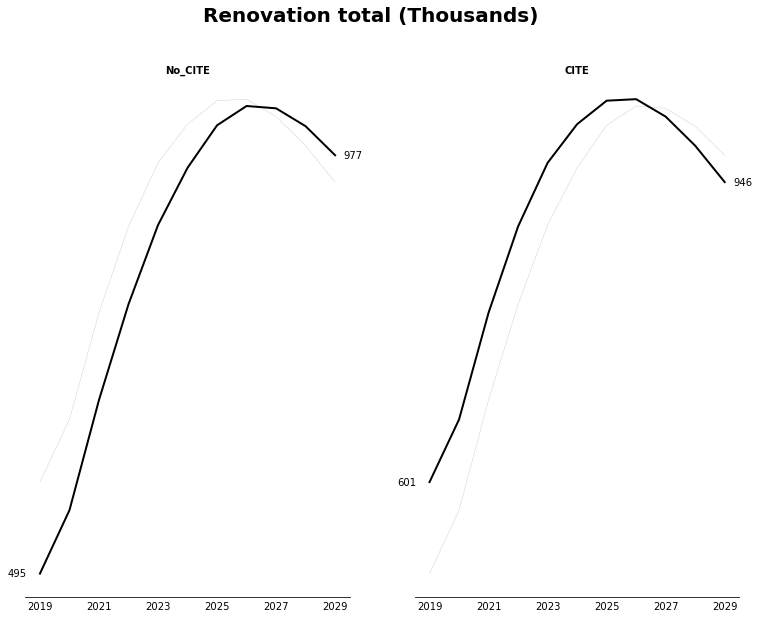

In [35]:
economic_subplots(renovations_total, 'Renovation total (Thousands)', n_columns=2)

### Efficacity

Billion € / TWh cumac --> 10^9€ / 10^9 kWh --> €/kWh

In [41]:
df = pd.concat((cost_subsidies, renovations_subsidies, cost_subsidies * 10**9 / (renovations_subsidies * 10**3)), axis=1)
df.columns = ['Billions €', 'Thousands renovation', '€/renovation']
df

,Billions €,Thousands renovation,€/renovation
2019,2.008820,105.311952,19074.945833
2020,2.072434,104.403310,19850.266622
2021,2.089377,100.445202,20801.166649
2022,1.969135,89.417687,22021.761089
2023,1.735115,71.587106,24237.808379
2024,1.451922,50.212380,28915.625206
2025,1.157663,28.344793,40842.187962
2026,0.864834,7.857921,110058.888095
2027,0.600633,9.547987,62906.765426
2028,0.394245,22.418411,17585.756377


## Objective 3 - Number of G & F buildings

No more F and G buildings in 2025.

In [42]:
gf_buildings = {scenario: main_result[scenario].loc['Number of G & F buildings', :] for scenario in scenarios}
gf_buildings = pd.DataFrame(gf_buildings).T / 10**6
gf_buildings_subsidies = abs(gf_buildings.iloc[0, :] - gf_buildings.iloc[1, :])
gf_buildings

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,4.287247,4.042440,3.765302,3.468432,3.162539,2.856809,2.560277,2.284456,2.032637,1.808668,1.614379
CITE,4.247479,3.967915,3.663677,3.347361,3.030066,2.721404,2.428681,2.162148,1.922225,1.712576,1.531766


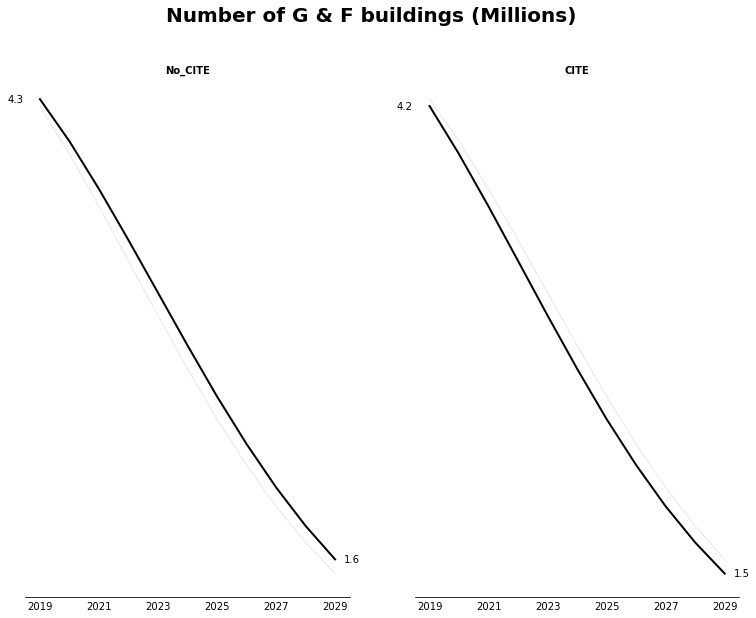

In [14]:
economic_subplots(gf_buildings, 'Number of G & F buildings (Millions)', n_columns=2, format_val=lambda x: '{:.1f}'.format(x))

### Efficacity

In [43]:
df = pd.concat((cost_subsidies, gf_buildings_subsidies, cost_subsidies * 10**9 / (gf_buildings_subsidies * 10**3)), axis=1)
df.columns = ['Billions €', 'Thousands renovation', '€/renovation']
df

,Billions €,Thousands renovation,€/renovation
2019,2.008820,0.039769,5.051260e+07
2020,2.072434,0.074525,2.780862e+07
2021,2.089377,0.101624,2.055979e+07
2022,1.969135,0.121072,1.626423e+07
2023,1.735115,0.132473,1.309786e+07
2024,1.451922,0.135405,1.072281e+07
2025,1.157663,0.131596,8.797117e+06
2026,0.864834,0.122308,7.070937e+06
2027,0.600633,0.110411,5.439967e+06
2028,0.394245,0.096092,4.102790e+06


## Objective 5

## Objective 4 - Emission total

gCO2 --> MTCO2 / 10**12

In [45]:
emission_total = {scenario: main_result[scenario].loc['Emission total', :] for scenario in scenarios}
emission_total = pd.DataFrame(emission_total).T / 10**12
emission_subsidies = abs(emission_total.iloc[0, :] - emission_total.iloc[1, :])

emission_total

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,41.894457,40.836763,39.724279,38.584851,37.449267,36.343636,35.297246,34.355210,33.565049,32.962956,32.574572
CITE,41.729677,40.515671,39.257877,37.992288,36.760919,35.594447,34.522218,33.587077,32.828787,32.277104,31.948096


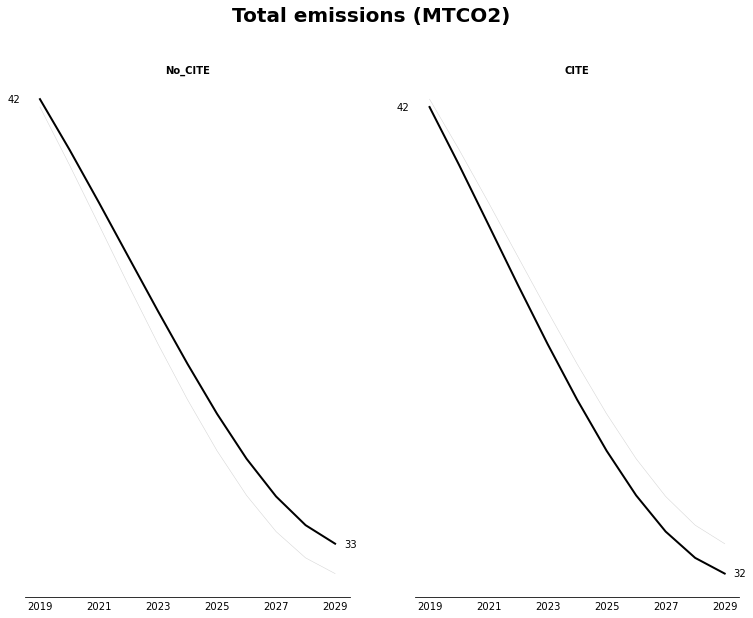

In [16]:
economic_subplots(emission_total, 'Total emissions (MTCO2)', n_columns=2, format_val=lambda x: '{:.0f}'.format(x))

### Efficacity

Billion € / Millions TCO2 cumac --> 10^9€ / 10^6 TCO2 --> €/kWh

In [48]:
df = pd.concat((cost_subsidies, emission_subsidies, cost_subsidies * 10**9 / (emission_subsidies * 10**6)), axis=1)
df.columns = ['Billions €', 'M TCO2', '€/kWh']
df

,Billions €,M TCO2,€/kWh
2019,2.008820,0.164780,12190.906536
2020,2.072434,0.321092,6454.322418
2021,2.089377,0.466402,4479.776556
2022,1.969135,0.592563,3323.081829
2023,1.735115,0.688348,2520.693118
2024,1.451922,0.749190,1937.990152
2025,1.157663,0.775027,1493.706529
2026,0.864834,0.768133,1125.890247
2027,0.600633,0.736263,815.786178
2028,0.394245,0.685853,574.824187
